In [1]:
from learningAgents import Model, ReinforceAlgorithm

In [2]:
game = Model(totalDemand = 400, 
               tupleCosts = (50, 50),
              totalStages = 25,
            initState = [400/2,0])

In [3]:
game.reset()

(tensor([200.,   0.]), 0, False)

In [4]:
game.adversaryChoosePrice()

125.0

In [5]:
import torch
import torch.nn as nn
from torch.distributions import Categorical

# Hyperparameters
lr = .003
gamma = 1
num_episodes = 20

nn_ = 100

policy = nn.Sequential(nn.Linear(2, nn_), 
                       nn.ReLU(),
                       nn.Linear(nn_,nn_),
                       nn.ReLU(),
                       nn.Linear(nn_,15),                       
                       nn.Softmax(dim=0))


optim = torch.optim.Adam(policy.parameters(), lr=lr)

In [6]:
algorithm = ReinforceAlgorithm(game, policy, optim, 10)

In [7]:
algorithm.solver()

tensor(65514.2227, grad_fn=<DivBackward0>)
tensor(269222.2500, grad_fn=<DivBackward0>)
tensor(138142.5781, grad_fn=<DivBackward0>)
tensor(57994.0820, grad_fn=<DivBackward0>)
tensor(67315.9062, grad_fn=<DivBackward0>)
tensor(65234.2383, grad_fn=<DivBackward0>)
tensor(60009.5508, grad_fn=<DivBackward0>)
tensor(52406.2695, grad_fn=<DivBackward0>)
tensor(48306.6250, grad_fn=<DivBackward0>)
tensor(38886.1523, grad_fn=<DivBackward0>)


In [8]:
import pandas as pd
profits = pd.DataFrame(game.profit).T
prices = pd.DataFrame(game.prices).T
demandPotential = pd.DataFrame(game.demandPotential).T

In [9]:
demandPotential

,0,1
0,200.000000,200.000000
1,205.000000,195.000000
2,207.500000,192.500000
3,208.750000,191.250000
4,209.375000,190.625000
5,209.687500,190.312500
6,209.843750,190.156250
7,209.921875,190.078125
8,209.960938,190.039062
9,209.980469,190.019531


<AxesSubplot:>

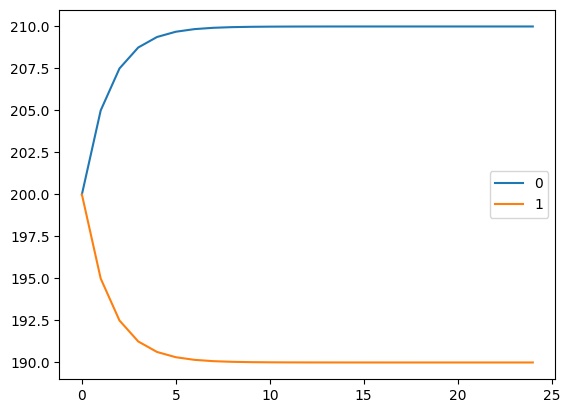

In [10]:
demandPotential.plot()

In [11]:
profits

,0,1
0,5525.000000,5625.000000
1,5906.250000,5256.250000
2,6101.562500,5076.562500
3,6200.390625,4987.890625
4,6250.097656,4943.847656
5,6275.024414,4921.899414
6,6287.506104,4910.943604
7,6293.751526,4905.470276
8,6296.875381,4902.734756
9,6298.437595,4901.367283


<AxesSubplot:>

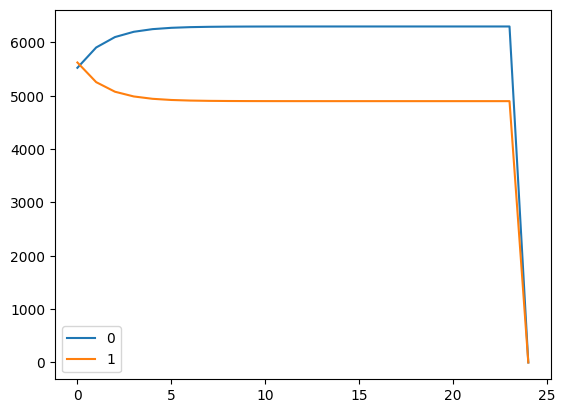

In [12]:
profits.plot()

In [13]:
prices

,0,1
0,115.000000,125.000000
1,117.500000,122.500000
2,118.750000,121.250000
3,119.375000,120.625000
4,119.687500,120.312500
5,119.843750,120.156250
6,119.921875,120.078125
7,119.960938,120.039062
8,119.980469,120.019531
9,119.990234,120.009766


<AxesSubplot:>

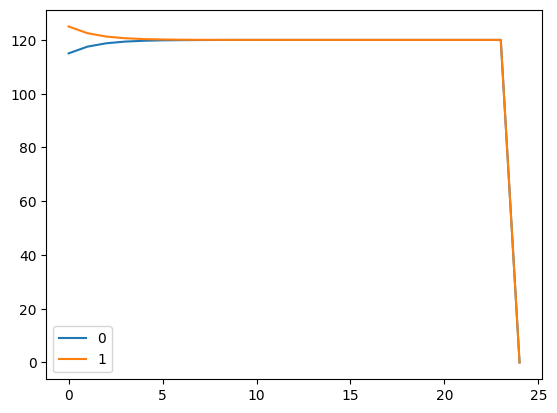

In [14]:
prices.plot()

In [15]:
learning = pd.DataFrame(algorithm.returns)
learning

,0
0,149633.333429
1,149633.333429
2,149633.333429
3,149633.333429
4,149633.333429
5,149633.333429
6,149633.333429
7,149633.333429
8,149633.333429
9,149633.333429


<AxesSubplot:>

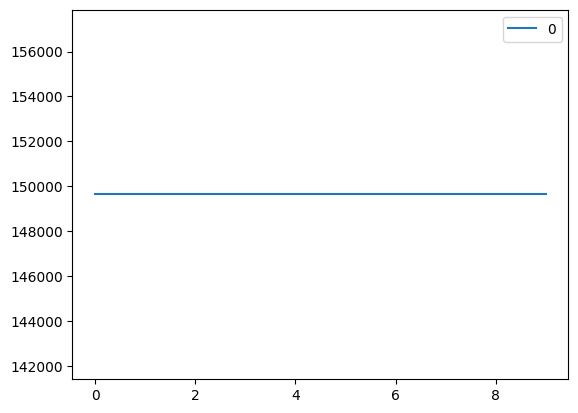

In [16]:
learning.plot()